# Introduction

## About client - lending Club

Finance company which is specialized in lending various types of loans to urban customers. It is a marketplace for borrowers seeking personal loans and  investors looking to lend money and make a return.  

#### Two types of risks associated with the bank’s decision while making  a decision for loan approval based on the applicant’s profile. 

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company


### Business objectives:

To understand the various features that contribute toward default.

To minimise the risk of losing money while lending to customers

To understand the influence the tendency of default based on  consumer attributes and loan attributes with EDA(driving factors)


### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import kurtosis,skew
from sklearn.impute import SimpleImputer

In [1]:
# Reading the csv file 
df = pd.read_csv("loan.csv") 
df.head()

NameError: name 'pd' is not defined

In [5]:
df.shape 

(39717, 111)

#### There are 39717 records and 111 attributes

## identifying the data type of each column

In [6]:
df_types=pd.DataFrame(df.dtypes,columns=['type'])
df_types['type'].value_counts() #column data type count

float64    74
object     24
int64      13
Name: type, dtype: int64

## Data Pre-processing: Finding out NaN values

In [7]:
df.isna().any()

id                            False
member_id                     False
loan_amnt                     False
funded_amnt                   False
funded_amnt_inv               False
                              ...  
tax_liens                      True
tot_hi_cred_lim                True
total_bal_ex_mort              True
total_bc_limit                 True
total_il_high_credit_limit     True
Length: 111, dtype: bool

## Identifying the columns  containing numerical variables and charecter variables


In [8]:
numerical_variables=df.sample(100).mean().index
numerical_variables

C:\Users\ahmed\AppData\Local\Temp\ipykernel_37648\386575355.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  numerical_variables=df.sample(100).mean().index


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
    

In [9]:
character_variables=[]
for i in df.columns:
    if i not in numerical_variables:
        character_variables.append(i)
character_variables

['term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'revol_util',
 'initial_list_status',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'application_type']

In [10]:
len(numerical_variables),len(character_variables)

(87, 24)

### There are 87 coulumns with numerical variables and 24 colums with charecter values

### Statistical Description of dataset

In [11]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


### Null Values Identification

In [12]:
null_values_table=(df.isna().sum()/df.shape[0])*100
null_values_table

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [13]:
high_null_value_columns =[]
high_null_value_columns=null_values_table[null_values_table> 80].index


In [14]:
len(high_null_value_columns)


56

In [15]:
low_null_value_columns=null_values_table[null_values_table<= 80].index

In [16]:
len(low_null_value_columns)

55

In [17]:
##From the analysis it was understood that, in the following columns more 80 rows are having null values


## cleaning all null value columns


In [18]:
# drop the columns containg all null values:

df.dropna(axis = 1, how = 'all', inplace=True) 

In [19]:
 df.shape 

(39717, 57)

In [20]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

###   columns like Id, member_id, etc.. We won’t be working with all the columns in the dataset, so I am going to be deleting the columns I don’t need.

In [21]:
df.drop("id",axis=1,inplace=True)
df.drop("member_id",axis=1,inplace=True)
df.drop("issue_d",axis=1,inplace=True)
df.drop("url",axis=1,inplace=True)
df.drop("zip_code",axis=1,inplace=True)
df.drop("emp_title",axis=1,inplace=True)
df.drop("desc",axis=1,inplace=True)

In [22]:
 df.shape 

(39717, 50)

# Univariate Analysis

##  How may people living in RENT' 'OWN'  , 'MORTGAGE'  , 'OTHER', 'NONE' have taken loan?

In [23]:
df['home_ownership'].value_counts()

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

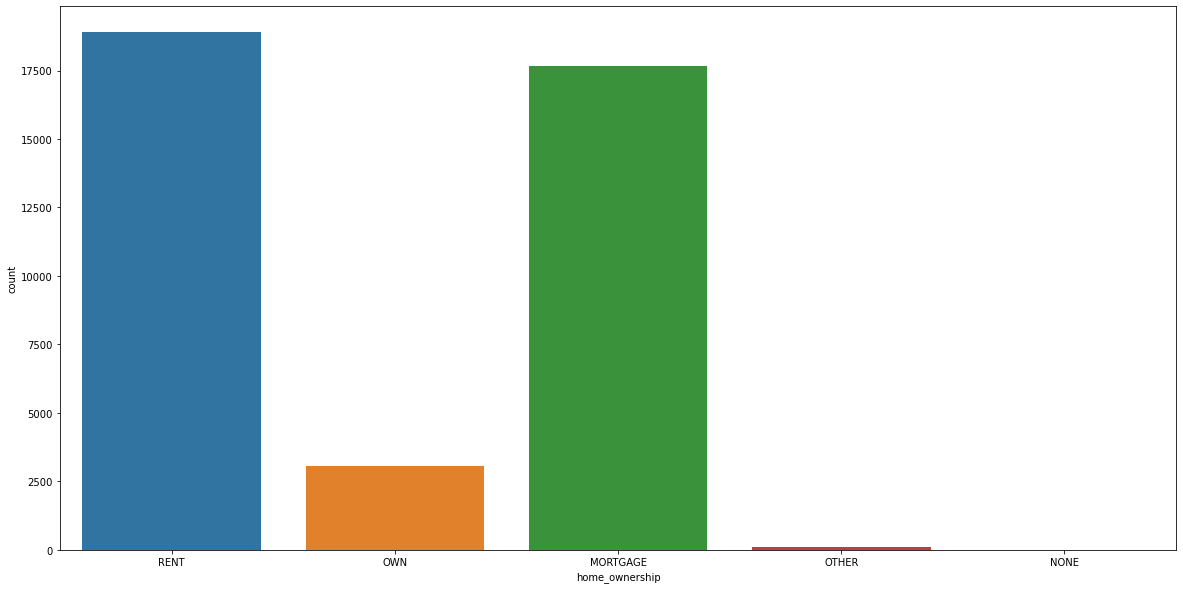

In [24]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='home_ownership', ax=ax, data=df)
plt.show()

In [25]:
 from sklearn.preprocessing import LabelEncoder
 le = LabelEncoder()
 df['home_ownership'] = le.fit_transform(df['home_ownership'])  # 'RENT' - 4, 'OWN' -3 , 'MORTGAGE' -2 , 'OTHER'-1 , 'NONE' - 0


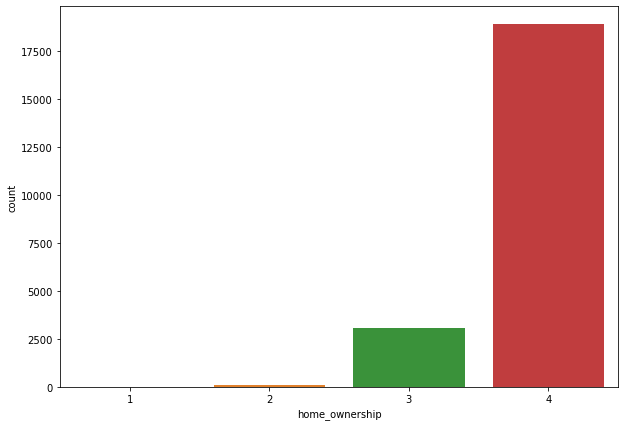

In [26]:
df = df[df.home_ownership != 0]  #removing the missing data rows
fig_dims = (10, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='home_ownership', ax=ax, data=df)
plt.show()

## BI- variate Analysis 
## people with their loan status

This indicates in fully paid categeory how many people are living in rent home, own home, mortagage, ..., like wise in other two categeories also

In [27]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

<AxesSubplot:xlabel='loan_status', ylabel='count'>

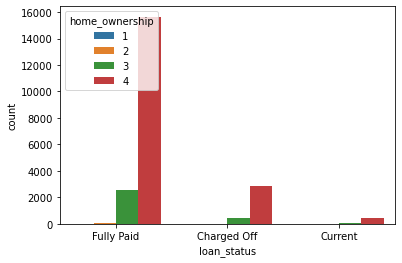

In [28]:
sns.countplot(x='loan_status',hue = 'home_ownership', data=df)


In [29]:
df[character_variables[1]].value_counts()

10.99%    489
13.49%    467
11.49%    437
7.51%     374
7.88%     355
         ... 
15.83%      1
16.08%      1
18.36%      1
14.88%      1
14.67%      1
Name: int_rate, Length: 359, dtype: int64

In [30]:
df[character_variables[2]].value_counts()

B    6788
A    4922
C    4821
D    3247
E    1579
F     538
G     163
Name: grade, dtype: int64

## Grade wise analysis of people with different intrest rates

there are 371 unique intrest rates and 7 uniue grades

In [31]:
df_character=pd.crosstab(df[character_variables[1]],df[character_variables[2]])

In [32]:
(df_character/df.shape[0])*100

grade,A,B,C,D,E,F,G
int_rate,,,,,,,
10.00%,0.0,0.680025,0.0,0.0,0.0,0.0,0.0
10.01%,0.0,0.027201,0.0,0.0,0.0,0.0,0.0
10.08%,0.0,0.122405,0.0,0.0,0.0,0.0,0.0
10.14%,0.0,0.027201,0.0,0.0,0.0,0.0,0.0
10.20%,0.0,0.049869,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
9.83%,0.0,0.022668,0.0,0.0,0.0,0.0,0.0
9.88%,0.0,0.466951,0.0,0.0,0.0,0.0,0.0
9.91%,0.0,1.029105,0.0,0.0,0.0,0.0,0.0


#### open_acc- The number of open credit lines in the borrower's credit file.


<AxesSubplot:xlabel='home_ownership', ylabel='open_acc'>

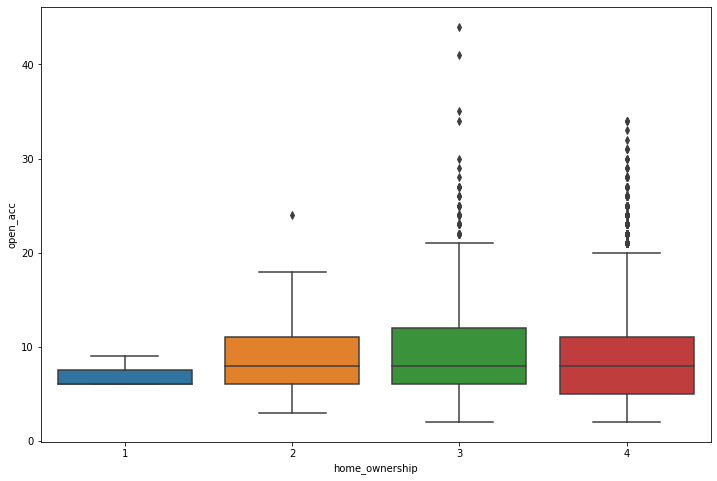

In [33]:
plt.figure(figsize = (12,8))
sns.boxplot(x='home_ownership',y='open_acc', data=df)

### important variables considered for analysis

Loan_amt
Term
Interest_rate
Grade
SubGrade
Annual Income
Purpose of loan
DTI (Debt to Income)
Emp_Lenght
Loan_Date(Month)
Home_Ownership
verification_status

In [34]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'pymnt_plan',
       'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens'],
      dtype='object')

In [74]:
newdf = df.copy(deep=True)
imp_variables=['loan_amnt','loan_status', 'term', 'int_rate','grade','sub_grade', 'annual_inc', 'purpose', 'dti', 'emp_length', 'home_ownership', 'verification_status','recoveries','delinq_2yrs','total_rec_late_fee'] 
for i in newdf.columns:
    if i not in imp_variables:
        newdf.drop(i,axis=1,inplace=True)



In [75]:
## copied the columns considered important for analysis to a new data frame
newdf.columns, newdf.shape

(Index(['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_length',
        'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
        'purpose', 'dti', 'delinq_2yrs', 'total_rec_late_fee', 'recoveries'],
       dtype='object'),
 (22058, 15))

In [37]:
# getting the numerical columns
num_cols = newdf._get_numeric_data().columns
num_cols

Index(['loan_amnt', 'home_ownership', 'annual_inc', 'dti', 'delinq_2yrs',
       'total_rec_late_fee', 'recoveries'],
      dtype='object')

In [38]:
# checking for missing data
null_values_table=(newdf.isna().sum()/df.shape[0])*100
null_values_table

loan_amnt              0.00000
term                   0.00000
int_rate               0.00000
grade                  0.00000
sub_grade              0.00000
emp_length             2.84704
home_ownership         0.00000
annual_inc             0.00000
verification_status    0.00000
loan_status            0.00000
purpose                0.00000
dti                    0.00000
delinq_2yrs            0.00000
total_rec_late_fee     0.00000
recoveries             0.00000
dtype: float64

# treating the null values

In [76]:

newdf["emp_length"].fillna( method ='ffill', inplace = True)

In [40]:
# verification of the null the data wheter all the missing data is taken care
null_values_table=(newdf.isna().sum()/df.shape[0])*100
null_values_table

loan_amnt              0.0
term                   0.0
int_rate               0.0
grade                  0.0
sub_grade              0.0
emp_length             0.0
home_ownership         0.0
annual_inc             0.0
verification_status    0.0
loan_status            0.0
purpose                0.0
dti                    0.0
delinq_2yrs            0.0
total_rec_late_fee     0.0
recoveries             0.0
dtype: float64

In [41]:
# identifying the charecter variables columns in the data frames
character_variables=[]
for i in newdf.columns:
    if i not in num_cols:
        character_variables.append(i)
character_variables

['term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_length',
 'verification_status',
 'loan_status',
 'purpose']

In [42]:
# drop the rows if any null values are present along the row
newdf.dropna(axis=0,inplace=True)

In [43]:
newdf.shape

(22058, 15)

In [44]:
newdf.describe()

,loan_amnt,home_ownership,annual_inc,dti,delinq_2yrs,total_rec_late_fee,recoveries
count,22058.000000,22058.000000,2.205800e+04,22058.000000,22058.000000,22058.000000,22058.000000
mean,10042.100372,3.852072,5.764241e+04,13.433071,0.139723,1.531457,84.629442
std,6729.638386,0.368447,4.457947e+04,6.741720,0.485421,7.625226,558.579679
min,500.000000,1.000000,4.000000e+03,0.000000,0.000000,0.000000,0.000000
25%,5000.000000,4.000000,3.500400e+04,8.200000,0.000000,0.000000,0.000000
50%,8400.000000,4.000000,5.000000e+04,13.575000,0.000000,0.000000,0.000000
75%,13750.000000,4.000000,7.000000e+04,18.840000,0.000000,0.000000,0.000000
max,35000.000000,4.000000,2.039784e+06,29.990000,11.000000,166.429711,19915.670000


In [45]:
num_cols = newdf._get_numeric_data().columns
num_cols

Index(['loan_amnt', 'home_ownership', 'annual_inc', 'dti', 'delinq_2yrs',
       'total_rec_late_fee', 'recoveries'],
      dtype='object')

In [46]:
asset_var = ['loan_amnt' ,'delinq_2yrs', 'annual_inc' , 'total_rec_late_fee']


C:\Users\ahmed\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\ahmed\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


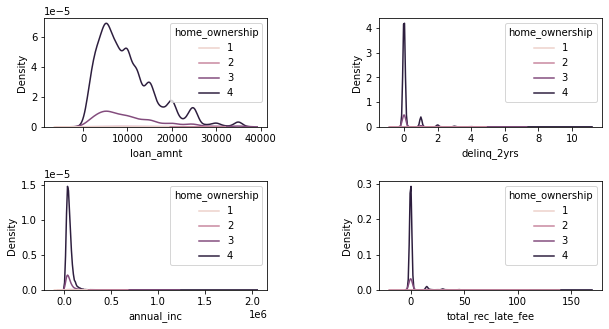

In [47]:
num_cols = newdf._get_numeric_data().columns
plt.figure(figsize =(10,5))
for i,cols in enumerate(asset_var):
    plt.subplot(2,2,i+1)
    sns.kdeplot( data =newdf , x = cols, hue =  'home_ownership' )
    plt.subplots_adjust(wspace=0.5, hspace =0.5)

In [48]:
newdf.nunique().sort_values()

term                      2
verification_status       3
loan_status               3
home_ownership            4
grade                     7
delinq_2yrs              10
emp_length               11
purpose                  14
sub_grade                35
int_rate                359
loan_amnt               727
total_rec_late_fee      843
recoveries             2492
dti                    2739
annual_inc             3279
dtype: int64

<AxesSubplot:xlabel='total_rec_late_fee', ylabel='Density'>

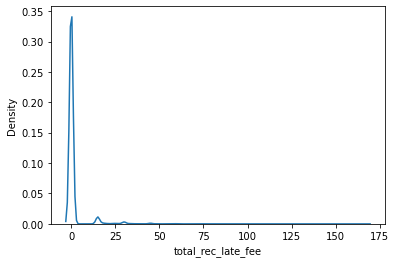

In [77]:
sns.kdeplot(data=newdf, x = 'total_rec_late_fee')

# Binning

In [78]:
bin = [0,10,20,30,40,50]
range =['0-10','10-20','20-30','30-40','above40']
newdf['total_rec_late_fee_range'] = pd.cut(newdf['total_rec_late_fee'],bin, labels = range)

<AxesSubplot:xlabel='total_rec_late_fee_range'>

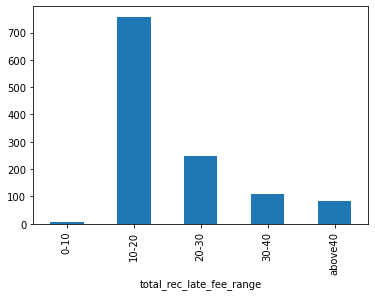

In [51]:
newdf.groupby(['total_rec_late_fee_range']).size().plot(kind="bar")

In [52]:
newdf['loan_status'].unique()  

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [53]:
newdf = newdf[df.loan_status != 'Current'] ### dropping the Current

In [54]:
newdf['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [55]:
newdf.shape

(21556, 16)

In [79]:
df['loan_status'] = le.fit_transform(df['loan_status']) # converting categorical to numerical

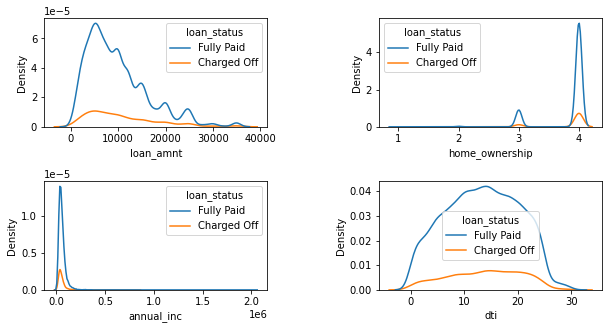

In [57]:
var = ['loan_amnt' ,'home_ownership', 'annual_inc' , 'dti']
num_cols = newdf._get_numeric_data().columns
plt.figure(figsize =(10,5))
for i,cols in enumerate(var):
    plt.subplot(2,2,i+1)
    sns.kdeplot( data =newdf , x = cols, hue =  'loan_status' )
    plt.subplots_adjust(wspace=0.5, hspace =0.5)

# Bivariate Analysis

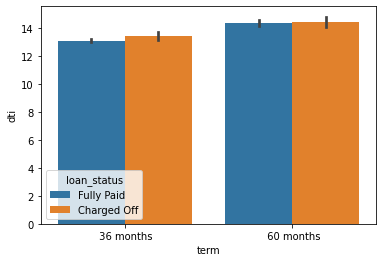

In [58]:
sns.barplot(x = "term", y = "dti", hue = "loan_status", data = newdf)
plt.show()

# outlier treatment in annual_inc

C:\Users\ahmed\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='annual_inc', ylabel='Density'>

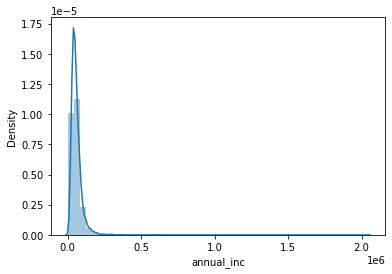

In [80]:
# outlier treatment
sns.distplot(newdf['annual_inc']) ## data is right skewed

C:\Users\ahmed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_inc'>

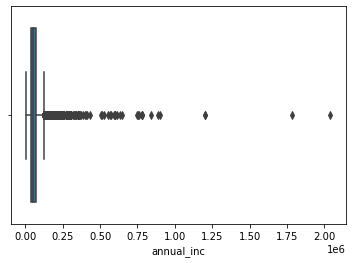

In [60]:
sns.boxplot(newdf['annual_inc'])

# identification of upper and lower limt from box plot

In [61]:
up_limit = newdf['annual_inc'].mean() + 3*newdf['annual_inc'].std()
low_limit = newdf['annual_inc'].mean() - 3*newdf['annual_inc'].std()

up_limit, low_limit

(191694.0381270193, -76631.28099582612)

In [81]:
newdf.loc[(newdf['annual_inc']>up_limit)|(newdf['annual_inc']<low_limit)]

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,total_rec_late_fee,recoveries,total_rec_late_fee_range
170,25000,36 months,12.42%,B,B4,2 years,4,225000.0,Verified,2,debt_consolidation,8.32,1,0.0,0.0,NaN
392,5000,36 months,6.62%,A,A2,1 year,4,276000.0,Source Verified,2,debt_consolidation,1.82,0,0.0,0.0,NaN
431,35000,60 months,19.42%,E,E3,8 years,4,195000.0,Verified,1,debt_consolidation,11.72,0,0.0,0.0,NaN
1069,12000,36 months,12.69%,B,B5,10+ years,4,200000.0,Source Verified,2,debt_consolidation,6.61,0,0.0,0.0,NaN
1617,10000,36 months,15.96%,C,C5,4 years,4,280000.0,Source Verified,2,credit_card,6.27,0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39098,16000,36 months,9.76%,B,B2,10+ years,4,572400.0,Not Verified,2,wedding,1.61,0,0.0,0.0,NaN
39247,8000,36 months,10.71%,B,B5,2 years,4,215000.0,Not Verified,2,medical,17.66,0,0.0,0.0,NaN
39339,15000,36 months,11.72%,C,C4,2 years,4,200000.0,Not Verified,2,medical,15.46,0,0.0,0.0,NaN
39543,16000,36 months,10.91%,C,C3,< 1 year,4,200000.0,Not Verified,2,credit_card,10.70,0,0.0,0.0,NaN


In [63]:
# the above table shows the outliers present in the annual income

# Trimming the outliers

In [64]:
newdf= newdf.loc[(newdf['annual_inc']<up_limit)&(newdf['annual_inc']>low_limit)]

# bivariate analysis after outlier treatment

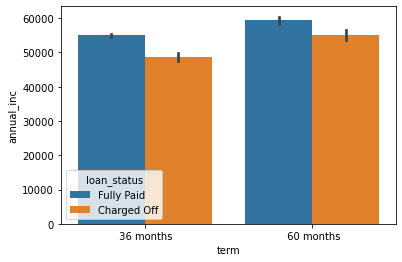

In [65]:
sns.barplot(x = "term", y = "annual_inc", hue = "loan_status", data = newdf) 
plt.show()

# Binning for Annual income

In [82]:
bin = [0,10000,20000,30000,40000,50000,60000]
range =['0-10k','10k-20k','20k-30k','30k-40k','40k-50k','above50k']
newdf['annual_inc'] = pd.cut(newdf['annual_inc'],bin, labels = range)

<AxesSubplot:xlabel='annual_inc'>

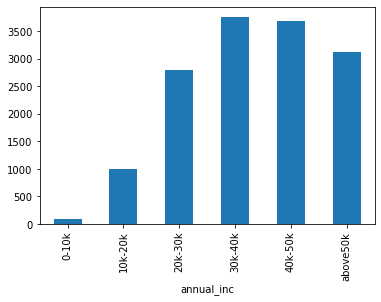

In [67]:
newdf.groupby(['annual_inc']).size().plot(kind="bar")

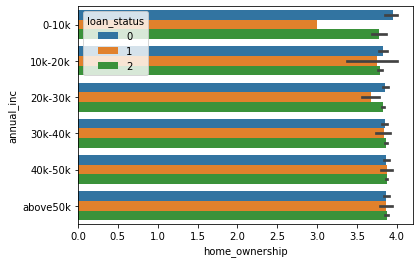

In [83]:
sns.barplot(x = "home_ownership", y = "annual_inc", hue = "loan_status", data = newdf) 
plt.show()

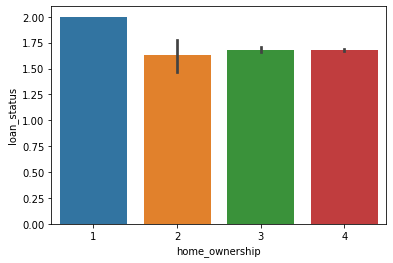

In [84]:
sns.barplot(x = "home_ownership", y = "loan_status", data = newdf) 
plt.show()

In [70]:
df_character=pd.crosstab(newdf['home_ownership'],newdf['loan_status'])
(df_character/newdf.shape[0])*100

loan_status,Charged Off,Fully Paid
home_ownership,,
1,0.000000,0.014048
2,0.079603,0.365237
3,2.055628,11.659487
4,13.176625,72.649373


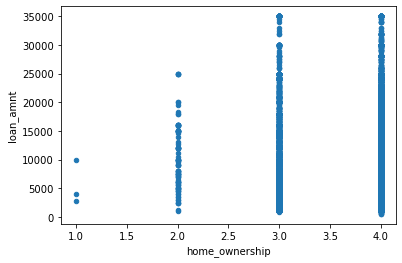

In [71]:
newdf.plot.scatter(x="home_ownership", y="loan_amnt")
plt.show()

### 'RENT' - 4, 'OWN' -3 , 'MORTGAGE' -2 , 'OTHER'-1 
people staying in  mortgage houses have taken less loan amount compared to people staying in rent and own houses

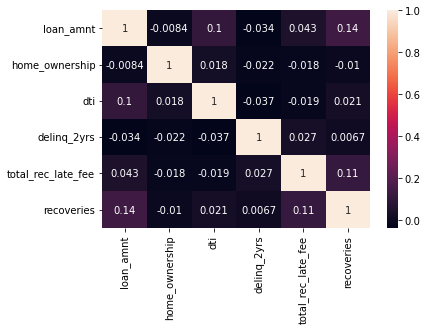

In [72]:
ax = sns.heatmap(newdf.corr(), annot=True) 

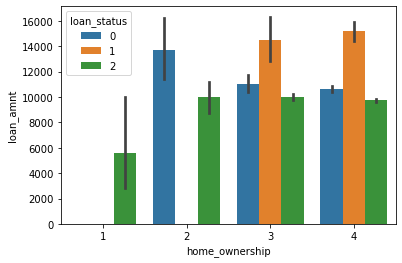

In [86]:
sns.barplot(x = "home_ownership", y = "loan_amnt", hue = "loan_status", data = newdf) 
plt.show()

# people staying in  mortgage houses are more defaulters